<a href="https://colab.research.google.com/github/u-t-k-a-n/Detection-of-Similar-Points-in-Traffic-Characteristics/blob/main/FileCleaning_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "drive/MyDrive/2017"
files = list()

In [4]:
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))
        

In [5]:
len_files = len(files)

In [6]:
len_under_10 = 0
len_over_130 = 0

for i in range(len_files):
  df = pd.read_csv(files[i])
  if df["1"].min() < 10:
    len_under_10 += 1
  if df["1"].max() > 130:
    len_over_130 += 1

  

In [7]:
len_over_130

886

In [8]:
len_under_10

1656

In [9]:
percentage_over_130 = (len_over_130/len_files)*100
percentage_under_10 = (len_under_10/len_files)*100

In [10]:
percentage_over_130

53.5024154589372

In [11]:
percentage_under_10

100.0

In [12]:
file_info = pd.DataFrame(columns=["under_10","over_130","percentage_under_10","percentage_over_130"])

In [13]:
df = pd.read_csv(files[0])
len_file = len(df)

In [14]:
for i in range(len_files):
  df = pd.read_csv(files[i]) 
  file_info.loc[files[i]] = [1 if df["1"].min() < 10 else 0,
                        1 if df["1"].max() > 130 else 0,
                        (len(df["1"][df["1"] < 10]) / len_file) *100,
                        (len(df["1"][df["1"] > 130]) / len_file) *100]
  


In [15]:
file_info.describe()

,under_10,over_130,percentage_under_10,percentage_over_130
count,1656.0,1656.000000,1656.000000,1656.000000
mean,1.0,0.535024,13.768251,0.130745
std,0.0,0.498922,15.867463,0.711467
min,1.0,0.000000,3.184932,0.000000
25%,1.0,0.000000,3.611587,0.000000
50%,1.0,1.000000,7.294996,0.000951
75%,1.0,1.000000,17.761606,0.031393
max,1.0,1.000000,100.000000,12.247907


In [16]:
file_info

,under_10,over_130,percentage_under_10,percentage_over_130
drive/MyDrive/2017/642_0_2017.csv,1.0,1.0,5.039954,0.122717
drive/MyDrive/2017/1889_0_2017.csv,1.0,1.0,3.224886,0.002854
drive/MyDrive/2017/588_1_2017.csv,1.0,0.0,5.203577,0.000000
drive/MyDrive/2017/629_0_2017.csv,1.0,1.0,4.140030,0.201674
drive/MyDrive/2017/1890_0_2017.csv,1.0,1.0,3.224886,0.002854
...,...,...,...,...
drive/MyDrive/2017/257_0_2017.csv,1.0,1.0,4.576674,0.000951
drive/MyDrive/2017/55_1_2017.csv,1.0,1.0,4.052511,0.004756
drive/MyDrive/2017/333_1_2017.csv,1.0,1.0,3.648212,0.013318
drive/MyDrive/2017/588_0_2017.csv,1.0,0.0,5.184551,0.000000


In [31]:
trash_files = list((file_info[file_info["percentage_under_10"]>=30]).index)

In [32]:
new_files = list()
for file_name in files:
  name = file_name.split("/")
  name = name[-1]
  name = name.rstrip("2017.csv")
  name = name.strip("_")
  id,direction = name.split("_")
  new_files.append((int(id),int(direction)))

data = pd.read_json('drive/MyDrive/Metadata/Coordinates.json')

for new_file in new_files:
  if not ((data["vSegID"] == new_file[0]) & (data["vSegDir"] == new_file[1])).sum():
    print(new_file)
    trash_files.append("drive/MyDrive/2017/{}_{}_2017.csv".format(new_file[0],new_file[1]))


(929, 0)
(930, 0)
(210, 1)


In [33]:
trash_files

['drive/MyDrive/2017/918_1_2017.csv',
 'drive/MyDrive/2017/918_0_2017.csv',
 'drive/MyDrive/2017/926_1_2017.csv',
 'drive/MyDrive/2017/927_1_2017.csv',
 'drive/MyDrive/2017/925_1_2017.csv',
 'drive/MyDrive/2017/919_0_2017.csv',
 'drive/MyDrive/2017/919_1_2017.csv',
 'drive/MyDrive/2017/928_1_2017.csv',
 'drive/MyDrive/2017/929_0_2017.csv',
 'drive/MyDrive/2017/1731_0_2017.csv',
 'drive/MyDrive/2017/924_1_2017.csv',
 'drive/MyDrive/2017/923_1_2017.csv',
 'drive/MyDrive/2017/920_1_2017.csv',
 'drive/MyDrive/2017/922_1_2017.csv',
 'drive/MyDrive/2017/925_0_2017.csv',
 'drive/MyDrive/2017/924_0_2017.csv',
 'drive/MyDrive/2017/921_1_2017.csv',
 'drive/MyDrive/2017/928_0_2017.csv',
 'drive/MyDrive/2017/921_0_2017.csv',
 'drive/MyDrive/2017/923_0_2017.csv',
 'drive/MyDrive/2017/920_0_2017.csv',
 'drive/MyDrive/2017/1776_1_2017.csv',
 'drive/MyDrive/2017/926_0_2017.csv',
 'drive/MyDrive/2017/922_0_2017.csv',
 'drive/MyDrive/2017/541_1_2017.csv',
 'drive/MyDrive/2017/305_0_2017.csv',
 'drive/My

In [35]:
proper_files = list(set(files) - set(trash_files))


for file_name in proper_files:
  df = pd.read_csv(file_name)
  file_name_split = file_name.split("/")
  df.to_csv("drive/MyDrive/2017_v1/"+file_name_split[-1],index=False)



In [39]:
file_info.sort_values("percentage_under_10",ascending=False)[:85]

,under_10,over_130,percentage_under_10,percentage_over_130
drive/MyDrive/2017/926_1_2017.csv,1.0,0.0,100.000000,0.000000
drive/MyDrive/2017/929_0_2017.csv,1.0,0.0,100.000000,0.000000
drive/MyDrive/2017/926_0_2017.csv,1.0,0.0,100.000000,0.000000
drive/MyDrive/2017/928_0_2017.csv,1.0,0.0,100.000000,0.000000
drive/MyDrive/2017/921_1_2017.csv,1.0,0.0,100.000000,0.000000
...,...,...,...,...
drive/MyDrive/2017/528_0_2017.csv,1.0,0.0,39.430175,0.000000
drive/MyDrive/2017/1194_0_2017.csv,1.0,0.0,38.975457,0.000000
drive/MyDrive/2017/2109_0_2017.csv,1.0,1.0,38.747146,0.015221
drive/MyDrive/2017/1052_0_2017.csv,1.0,1.0,38.539764,0.001903


In [40]:
file_info.sort_values("percentage_over_130",ascending=False)

,under_10,over_130,percentage_under_10,percentage_over_130
drive/MyDrive/2017/1730_0_2017.csv,1.0,1.0,14.421613,12.247907
drive/MyDrive/2017/1730_1_2017.csv,1.0,1.0,16.946347,10.472793
drive/MyDrive/2017/190_1_2017.csv,1.0,1.0,18.028919,10.374810
drive/MyDrive/2017/649_1_2017.csv,1.0,1.0,43.655822,9.494863
drive/MyDrive/2017/648_1_2017.csv,1.0,1.0,41.230023,7.578957
...,...,...,...,...
drive/MyDrive/2017/532_0_2017.csv,1.0,0.0,35.232116,0.000000
drive/MyDrive/2017/1041_1_2017.csv,1.0,0.0,34.065830,0.000000
drive/MyDrive/2017/2056_0_2017.csv,1.0,0.0,30.993151,0.000000
drive/MyDrive/2017/9_0_2017.csv,1.0,0.0,12.906202,0.000000


In [41]:
import seaborn as sns

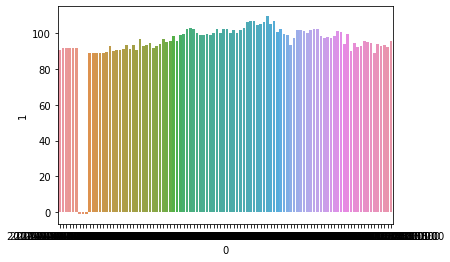

In [42]:
sns.barplot(x=df["0"][:100],y=df["1"][:100])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


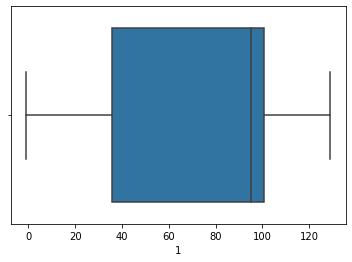

In [43]:
sns.boxplot(df["1"])

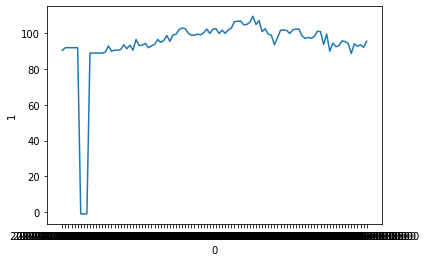

In [44]:
sns.lineplot(y=df["1"][:100],x=df["0"][:100])